In [1]:
import pandas as pd
import json
import requests
import glob
import numpy as np
import statistics
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

LOADING DATASET

In [2]:
df1 = pd.read_csv("D://6_Singapore Resale Flat Prices Predicting//Resale Flat Prices - DATASET//ResaleFlatPricesBasedonApprovalDate19901999.csv")

df1.head()


,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200


In [3]:
df2 = pd.read_csv("D://6_Singapore Resale Flat Prices Predicting//Resale Flat Prices - DATASET//ResaleFlatPricesBasedonApprovalDate2000Feb2012.csv")

df2.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,2000-01,ANG MO KIO,3 ROOM,170,ANG MO KIO AVE 4,07 TO 09,69.0,Improved,1986,147000.0
1,2000-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,04 TO 06,61.0,Improved,1986,144000.0
2,2000-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,07 TO 09,73.0,New Generation,1976,159000.0
3,2000-01,ANG MO KIO,3 ROOM,215,ANG MO KIO AVE 1,07 TO 09,73.0,New Generation,1976,167000.0
4,2000-01,ANG MO KIO,3 ROOM,218,ANG MO KIO AVE 1,07 TO 09,67.0,New Generation,1976,163000.0


In [4]:
df3 = pd.read_csv("D://6_Singapore Resale Flat Prices Predicting//Resale Flat Prices - DATASET//ResaleFlatPricesBasedonRegistrationDateFromMar2012toDec2014.csv")

df3.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,2012-03,ANG MO KIO,2 ROOM,172,ANG MO KIO AVE 4,06 TO 10,45.0,Improved,1986,250000.0
1,2012-03,ANG MO KIO,2 ROOM,510,ANG MO KIO AVE 8,01 TO 05,44.0,Improved,1980,265000.0
2,2012-03,ANG MO KIO,3 ROOM,610,ANG MO KIO AVE 4,06 TO 10,68.0,New Generation,1980,315000.0
3,2012-03,ANG MO KIO,3 ROOM,474,ANG MO KIO AVE 10,01 TO 05,67.0,New Generation,1984,320000.0
4,2012-03,ANG MO KIO,3 ROOM,604,ANG MO KIO AVE 5,06 TO 10,67.0,New Generation,1980,321000.0


In [5]:
df4 = pd.read_csv("D://6_Singapore Resale Flat Prices Predicting//Resale Flat Prices - DATASET//ResaleFlatPricesBasedonRegistrationDateFromJan2015toDec2016.csv")

df4.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2015-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,70,255000.0
1,2015-01,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1981,65,275000.0
2,2015-01,ANG MO KIO,3 ROOM,163,ANG MO KIO AVE 4,01 TO 03,69.0,New Generation,1980,64,285000.0
3,2015-01,ANG MO KIO,3 ROOM,446,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1979,63,290000.0
4,2015-01,ANG MO KIO,3 ROOM,557,ANG MO KIO AVE 10,07 TO 09,68.0,New Generation,1980,64,290000.0


In [6]:
df5 = pd.read_csv("D://6_Singapore Resale Flat Prices Predicting//Resale Flat Prices - DATASET//ResaleflatpricesbasedonregistrationdatefromJan2017onwards.csv")

df5.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0


In [7]:
# Merging all the datasets into one dataframe

df = pd.concat([df1 , df2 , df3, df4, df5], axis=0)

df.head()

df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,NaN
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,NaN
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,NaN
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,NaN
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
181985,2024-06,YISHUN,EXECUTIVE,351,YISHUN AVE 11,04 TO 06,146.0,Maisonette,1988,800000.0,63 years 03 months
181986,2024-06,YISHUN,EXECUTIVE,328,YISHUN RING RD,04 TO 06,142.0,Apartment,1988,850000.0,63 years 01 month
181987,2024-06,YISHUN,EXECUTIVE,723,YISHUN ST 71,10 TO 12,146.0,Maisonette,1986,790000.0,61 years
181988,2024-06,YISHUN,EXECUTIVE,826,YISHUN ST 81,10 TO 12,146.0,Maisonette,1988,1000000.0,62 years 08 months


UNDERSTANDING DATASET

In [8]:
df.shape

(928193, 11)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 928193 entries, 0 to 181989
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                928193 non-null  object 
 1   town                 928193 non-null  object 
 2   flat_type            928193 non-null  object 
 3   block                928193 non-null  object 
 4   street_name          928193 non-null  object 
 5   storey_range         928193 non-null  object 
 6   floor_area_sqm       928193 non-null  float64
 7   flat_model           928193 non-null  object 
 8   lease_commence_date  928193 non-null  int64  
 9   resale_price         928193 non-null  float64
 10  remaining_lease      219143 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 85.0+ MB


In [10]:
df.dtypes

month                   object
town                    object
flat_type               object
block                   object
street_name             object
storey_range            object
floor_area_sqm         float64
flat_model              object
lease_commence_date      int64
resale_price           float64
remaining_lease         object
dtype: object

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
floor_area_sqm,928193.0,95.690515,25.823874,28.0,73.0,93.0,113.0,307.0
lease_commence_date,928193.0,1988.285618,10.673121,1966.0,1981.0,1986.0,1996.0,2020.0
resale_price,928193.0,321078.355609,170748.192638,5000.0,193000.0,298000.0,418000.0,1588000.0


CHECKING NULL VALUES

In [12]:
df.isnull().sum()

month                       0
town                        0
flat_type                   0
block                       0
street_name                 0
storey_range                0
floor_area_sqm              0
flat_model                  0
lease_commence_date         0
resale_price                0
remaining_lease        709050
dtype: int64

In [13]:
# droping remaining_lease missing values
df = df.dropna()
df.isnull().sum()

month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
resale_price           0
remaining_lease        0
dtype: int64

CHECKING UNIQUE VALUE COUNT

In [14]:
# checking the unique values in flat_type feature
df['flat_type'].value_counts()

flat_type
4 ROOM              91946
5 ROOM              53967
3 ROOM              53116
EXECUTIVE           16358
2 ROOM               3591
MULTI-GENERATION       83
1 ROOM                 82
Name: count, dtype: int64

In [15]:
# checking the unique values in town feature
df['town'].value_counts()

town
SENGKANG           17667
WOODLANDS          15484
PUNGGOL            15050
JURONG WEST        14927
TAMPINES           14859
YISHUN             14634
BEDOK              12105
HOUGANG            11096
CHOA CHU KANG      10098
ANG MO KIO          9347
BUKIT BATOK         8494
BUKIT MERAH         8361
BUKIT PANJANG       8077
TOA PAYOH           6787
KALLANG/WHAMPOA     6618
PASIR RIS           6588
SEMBAWANG           5990
QUEENSTOWN          5987
GEYLANG             5485
CLEMENTI            5020
JURONG EAST         4571
SERANGOON           4152
BISHAN              3976
CENTRAL AREA        1878
MARINE PARADE       1346
BUKIT TIMAH          546
Name: count, dtype: int64

In [16]:
df['storey_range'].value_counts()

storey_range
04 TO 06    50834
07 TO 09    46444
10 TO 12    41023
01 TO 03    39112
13 TO 15    20609
16 TO 18     9488
19 TO 21     4038
22 TO 24     2867
25 TO 27     1698
28 TO 30     1101
31 TO 33      580
34 TO 36      529
37 TO 39      461
40 TO 42      224
43 TO 45       65
46 TO 48       53
49 TO 51       17
Name: count, dtype: int64

In [17]:
df['flat_model'].value_counts()

flat_model
Model A                   74583
Improved                  54312
New Generation            28935
Premium Apartment         24076
Simplified                 8860
Apartment                  8198
Maisonette                 6205
Standard                   6158
DBSS                       3243
Model A2                   2661
Type S1                     436
Model A-Maisonette          396
Adjoined flat               369
Type S2                     217
Terrace                     122
Premium Apartment Loft      108
2-room                      103
Multi Generation             83
3Gen                         32
Improved-Maisonette          30
Premium Maisonette           16
Name: count, dtype: int64

In [18]:
df.columns

Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date', 'resale_price',
       'remaining_lease'],
      dtype='object')

CHECKING DATA TYPES

In [19]:
df.dtypes

month                   object
town                    object
flat_type               object
block                   object
street_name             object
storey_range            object
floor_area_sqm         float64
flat_model              object
lease_commence_date      int64
resale_price           float64
remaining_lease         object
dtype: object

CONVERTING MONTH (OBJECT TO DATETIMEFORMAT)

In [20]:

# Convert the 'month' column to a datetime format
df['month'] = pd.to_datetime(df['month'])

# Extract the year and month into separate columns
df['year'] = df['month'].dt.year
df['month_of_year'] = df['month'].dt.month
df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,year,month_of_year
0,2015-01-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,255000.0,70,2015,1
1,2015-01-01,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1981,275000.0,65,2015,1
2,2015-01-01,ANG MO KIO,3 ROOM,163,ANG MO KIO AVE 4,01 TO 03,69.0,New Generation,1980,285000.0,64,2015,1
3,2015-01-01,ANG MO KIO,3 ROOM,446,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1979,290000.0,63,2015,1
4,2015-01-01,ANG MO KIO,3 ROOM,557,ANG MO KIO AVE 10,07 TO 09,68.0,New Generation,1980,290000.0,64,2015,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
181985,2024-06-01,YISHUN,EXECUTIVE,351,YISHUN AVE 11,04 TO 06,146.0,Maisonette,1988,800000.0,63 years 03 months,2024,6
181986,2024-06-01,YISHUN,EXECUTIVE,328,YISHUN RING RD,04 TO 06,142.0,Apartment,1988,850000.0,63 years 01 month,2024,6
181987,2024-06-01,YISHUN,EXECUTIVE,723,YISHUN ST 71,10 TO 12,146.0,Maisonette,1986,790000.0,61 years,2024,6
181988,2024-06-01,YISHUN,EXECUTIVE,826,YISHUN ST 81,10 TO 12,146.0,Maisonette,1988,1000000.0,62 years 08 months,2024,6


In [21]:

df['lease_commence_year'] = pd.to_datetime(df['lease_commence_date'],format = '%Y').dt.year

In [22]:
# Extract the remaining_lease feature

data = df['remaining_lease']
house_new = pd.DataFrame(data)

# Extract years and months using regular expressions
lease_info = df['remaining_lease'].str.extract(r'(\d+) years (\d+) months')
lease_info.columns = ['years', 'months']

# Convert to numeric values
df['remaining_lease_years'] = pd.to_numeric(lease_info['years'])
df['remaining_lease_months'] = pd.to_numeric(lease_info['months'])



COPYING DATASET FOR FURTHER USE

In [23]:
df_new_data = df.copy()

In [24]:
df.isnull().sum()

month                         0
town                          0
flat_type                     0
block                         0
street_name                   0
storey_range                  0
floor_area_sqm                0
flat_model                    0
lease_commence_date           0
resale_price                  0
remaining_lease               0
year                          0
month_of_year                 0
lease_commence_year           0
remaining_lease_years     66924
remaining_lease_months    66924
dtype: int64

HANDLING NULL VALUES- NULL VALUE IMPUTATION

In [25]:
# handling the null values using mean method
df_new_data['remaining_lease_years'].fillna(df['remaining_lease_years'].mean(),inplace = True)
df_new_data['remaining_lease_months'].fillna(df['remaining_lease_months'].mean(),inplace = True)
df_new_data.isnull().sum()

month                     0
town                      0
flat_type                 0
block                     0
street_name               0
storey_range              0
floor_area_sqm            0
flat_model                0
lease_commence_date       0
resale_price              0
remaining_lease           0
year                      0
month_of_year             0
lease_commence_year       0
remaining_lease_years     0
remaining_lease_months    0
dtype: int64

DROPING EXISTING COLUMN

In [26]:
#  droping the existing features 

df_new_data.drop(columns=['month','lease_commence_date','remaining_lease'],inplace = True)

FEATURE ENGINEERING

ENCODING- LABEL ENCODER

In [27]:
from sklearn.preprocessing import LabelEncoder

In [28]:
encoder = LabelEncoder()
df_new_data['town'] = encoder.fit_transform(df_new_data['town'])
df_new_data['flat_type'] = encoder.fit_transform(df_new_data['flat_type'])
df_new_data['storey_range'] = encoder.fit_transform(df_new_data['storey_range'])
df_new_data['flat_model'] = encoder.fit_transform(df_new_data['flat_model'])

In [29]:
# after encoding descriptive statistics analaysis

df_new_data.describe().T

,count,mean,std,min,25%,50%,75%,max
town,219143.0,13.891550,7.955832,0.0,8.0,14.000000,21.0,25.0
flat_type,219143.0,3.120415,0.919267,0.0,2.0,3.000000,4.0,6.0
storey_range,219143.0,2.219998,1.948152,0.0,1.0,2.000000,3.0,16.0
floor_area_sqm,219143.0,97.122527,24.056710,31.0,81.0,93.000000,112.0,280.0
flat_model,219143.0,8.690618,3.645456,0.0,5.0,8.000000,12.0,20.0
resale_price,219143.0,487909.614890,168790.002193,140000.0,365000.0,455000.000000,580000.0,1588000.0
year,219143.0,2019.625450,2.693544,2015.0,2017.0,2020.000000,2022.0,2024.0
month_of_year,219143.0,6.495257,3.398524,1.0,4.0,7.000000,9.0,12.0
lease_commence_year,219143.0,1995.156797,13.695589,1966.0,1985.0,1995.000000,2005.0,2020.0
remaining_lease_years,219143.0,74.026074,11.613742,41.0,66.0,74.026074,80.0,97.0


EDA

DATA  VISUALIZATION
TO FIND SKEWNESS AND OUTLIERS

In [30]:
# find outliers - box plot & skewed data - hist plot and violin plot

def plot(df_new_data,column):
    plt.figure(figsize =(15,6))
    plt.subplot(1,3,1)
    sns.boxplot(data = df_new_data ,x = column)
    plt.title(f'box plot for {column}')
    

    plt.subplot(1,3,2)
    sns.histplot(data = df_new_data ,x = column,kde = True ,bins = 40)
    plt.title(f'distribution  plot for {column}')

    plt.subplot(1,3,3)
    sns.violinplot(data=df_new_data, x=column)
    plt.title(f'Violin Plot for {column}')
    plt.show()

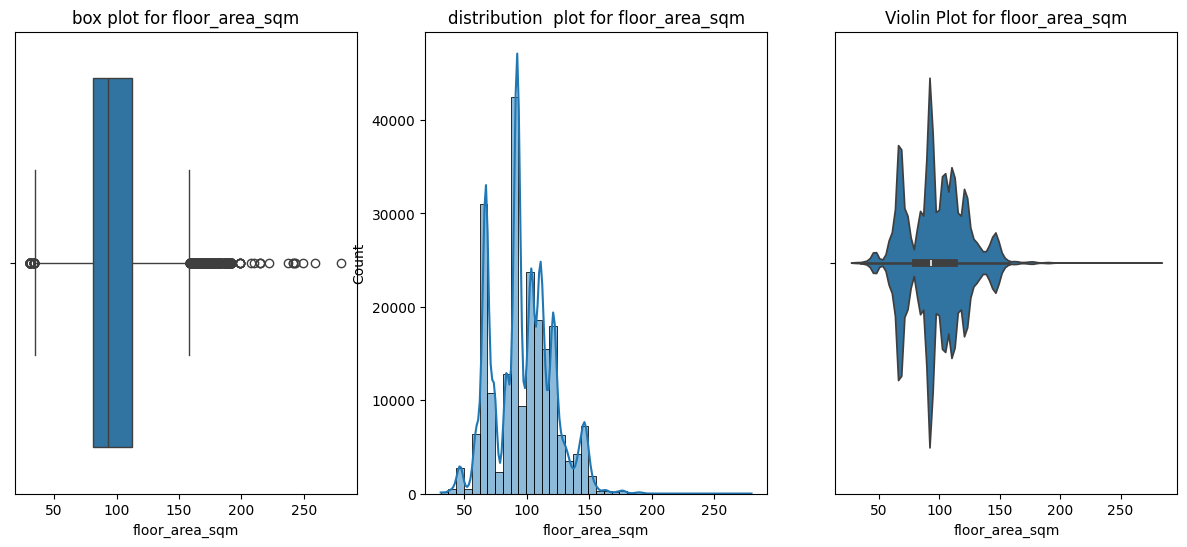

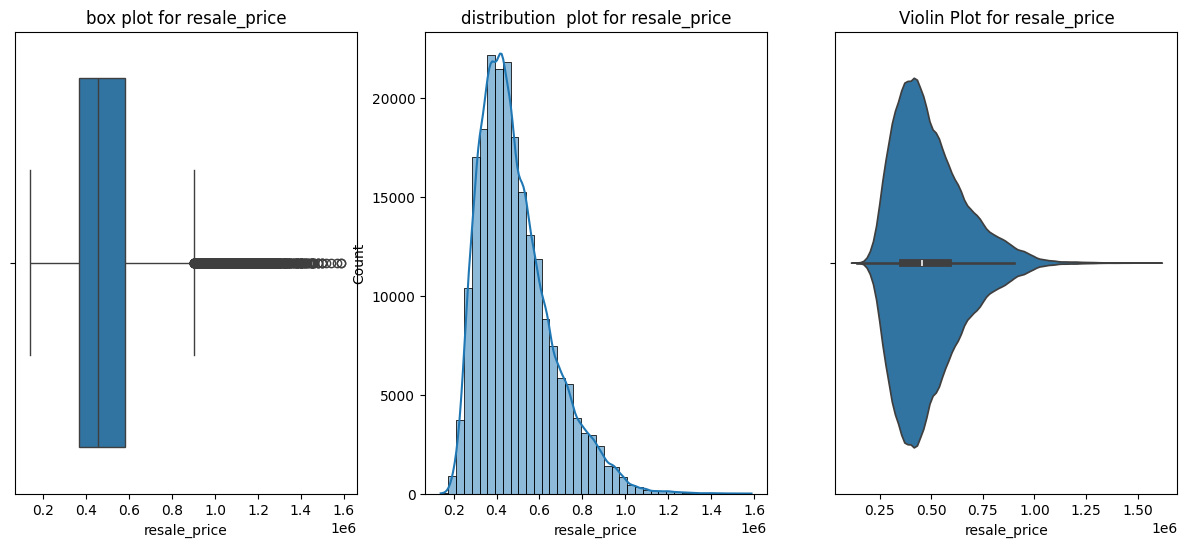

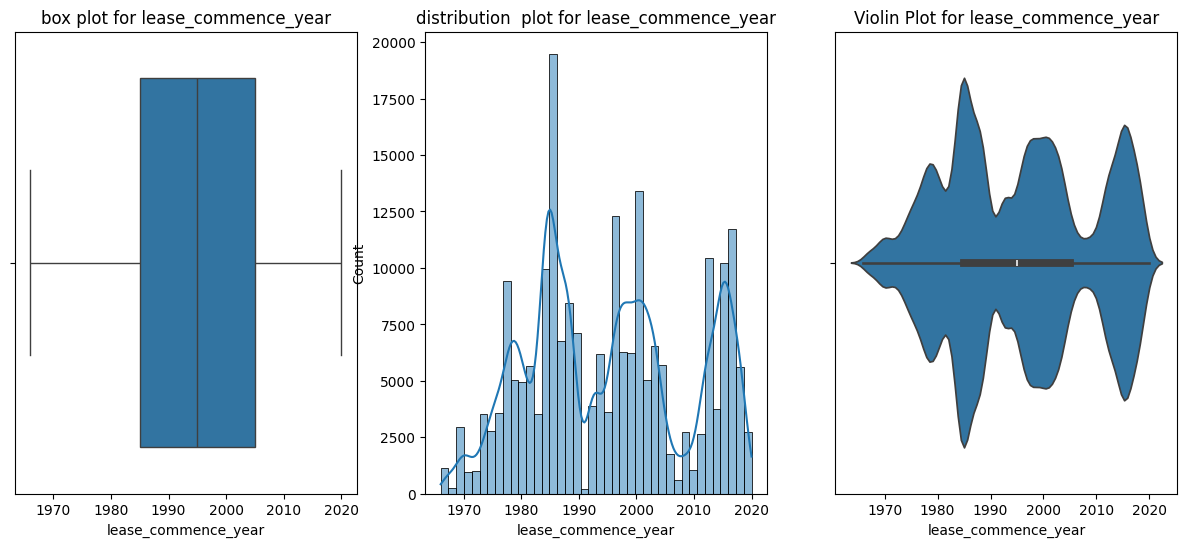

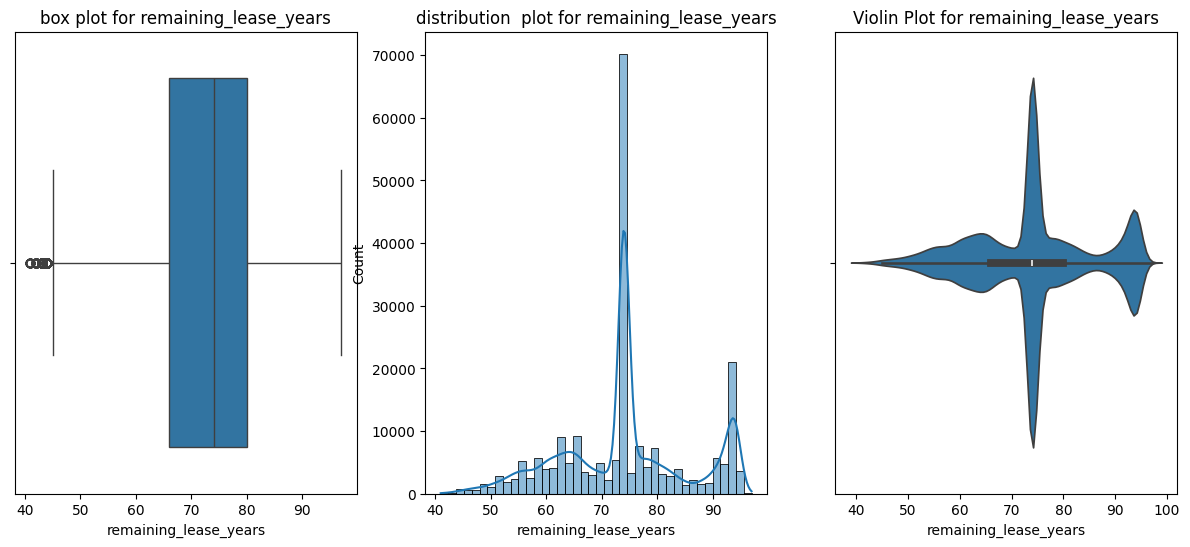

In [31]:
for i in ['floor_area_sqm','resale_price','lease_commence_year','remaining_lease_years']:
    plot(df_new_data ,i)

HANDLING SKEWED DATA USING LOG TRANSFORMATION

In [32]:
# 'floor_area_sqm','resale_price' this two feature are skewd.
# so using the log transformation method to handle the skewness data


df_new_data['floor_area_sqm'] = np.log(df_new_data['floor_area_sqm'])
df_new_data['resale_price'] = np.log(df_new_data['resale_price'])

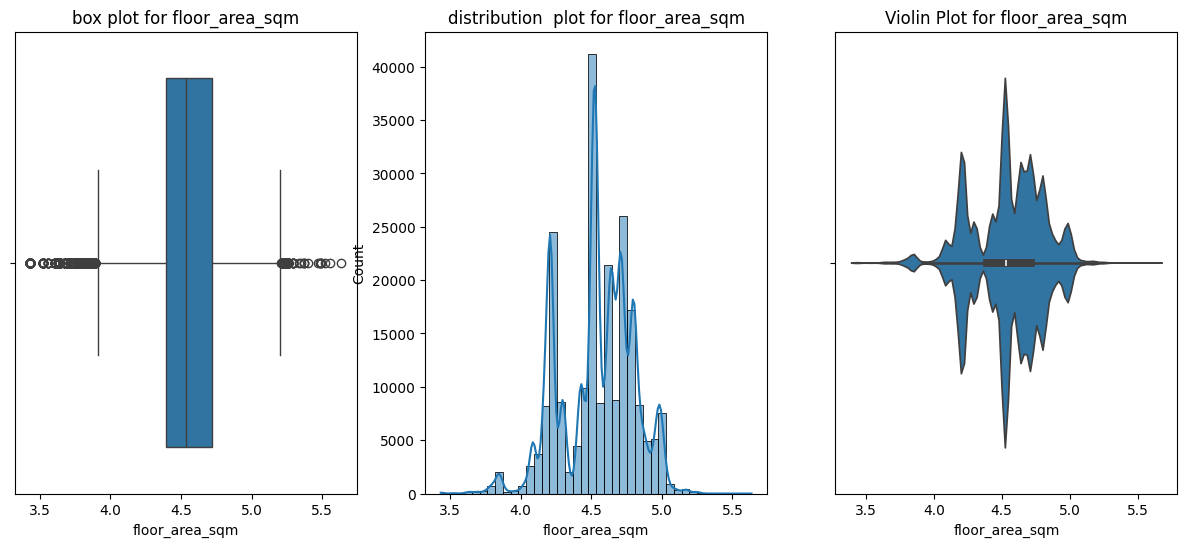

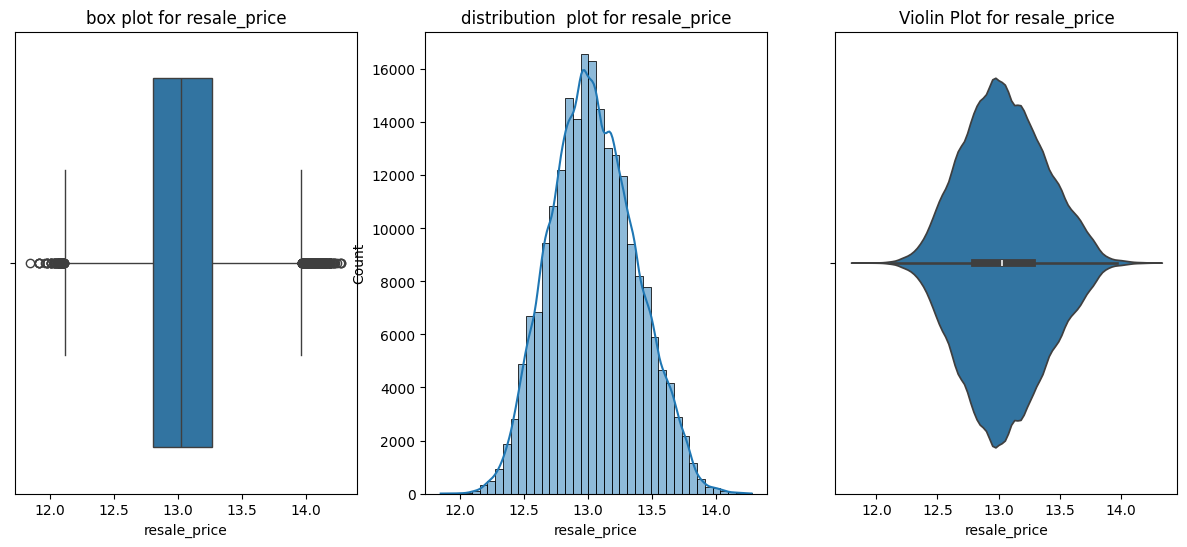

In [33]:
for i in ['floor_area_sqm','resale_price']:
    plot(df_new_data,i)

OUTLIER TREATMENT

In [34]:
# Using IQR and clip() methods to handle the outliers and add a new column of dataframe
# formula IQR = Q3_Q1
def outlier(df_new_data ,column):
    IQR = df_new_data[column].quantile(0.75)-df_new_data[column].quantile(0.25)
    upper_value = df_new_data[column].quantile(0.75)+1.5*IQR
    lower_value = df_new_data[column].quantile(0.25)-1.5*IQR
    
    df_new_data[column] =     df_new_data[column].clip(upper_value,lower_value)


In [35]:

# (Ex: lower threshold = 5 and upper threshold = 20)
# above upper threshold values (>20) are converted to upper threshold value (20) in features
# below lower threshold values (<5)  are converted to lower threshold value (5)  in features


outlier(df_new_data, 'floor_area_sqm')
outlier(df_new_data, 'resale_price')
df_new_data1 = df_new_data.copy()

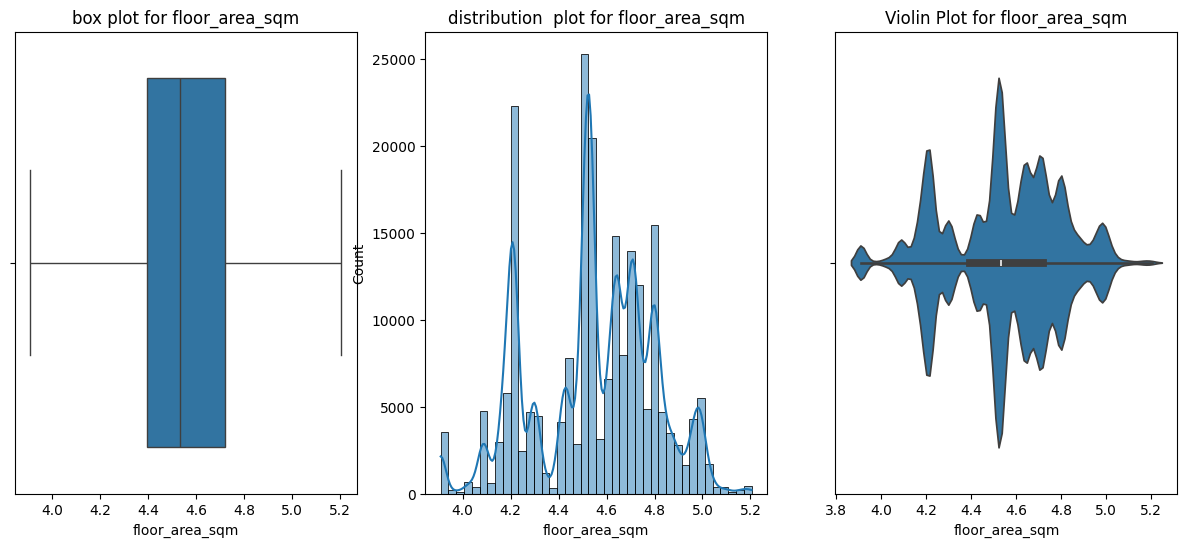

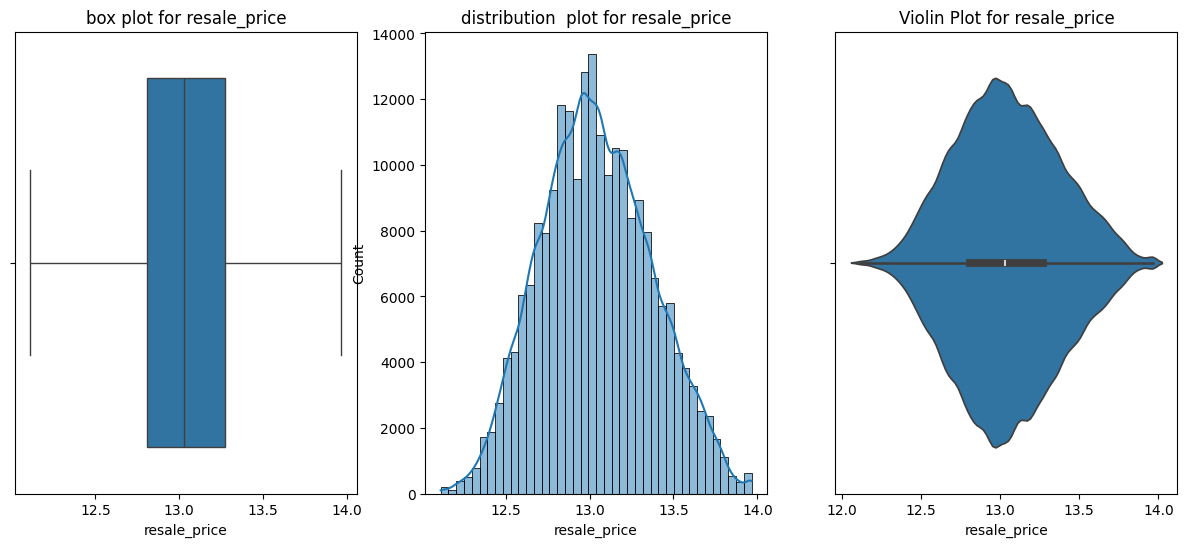

In [36]:
# after IQR using checking the skewness
for i in ['floor_area_sqm','resale_price']:
    plot(df_new_data1,i)

In [37]:
df_new_data1.describe().T

,count,mean,std,min,25%,50%,75%,max
town,219143.0,13.891550,7.955832,0.000000,8.000000,14.000000,21.000000,25.000000
flat_type,219143.0,3.120415,0.919267,0.000000,2.000000,3.000000,4.000000,6.000000
storey_range,219143.0,2.219998,1.948152,0.000000,1.000000,2.000000,3.000000,16.000000
floor_area_sqm,219143.0,4.545579,0.252681,3.908375,4.394449,4.532599,4.718499,5.204573
flat_model,219143.0,8.690618,3.645456,0.000000,5.000000,8.000000,12.000000,20.000000
resale_price,219143.0,13.041884,0.331529,12.112957,12.807653,13.028053,13.270783,13.965480
year,219143.0,2019.625450,2.693544,2015.000000,2017.000000,2020.000000,2022.000000,2024.000000
month_of_year,219143.0,6.495257,3.398524,1.000000,4.000000,7.000000,9.000000,12.000000
lease_commence_year,219143.0,1995.156797,13.695589,1966.000000,1985.000000,1995.000000,2005.000000,2020.000000
remaining_lease_years,219143.0,74.026074,11.613742,41.000000,66.000000,74.026074,80.000000,97.000000


In [38]:
df_new_data1.columns

Index(['town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'resale_price', 'year', 'month_of_year',
       'lease_commence_year', 'remaining_lease_years',
       'remaining_lease_months'],
      dtype='object')

<Axes: xlabel='resale_price', ylabel='flat_type'>

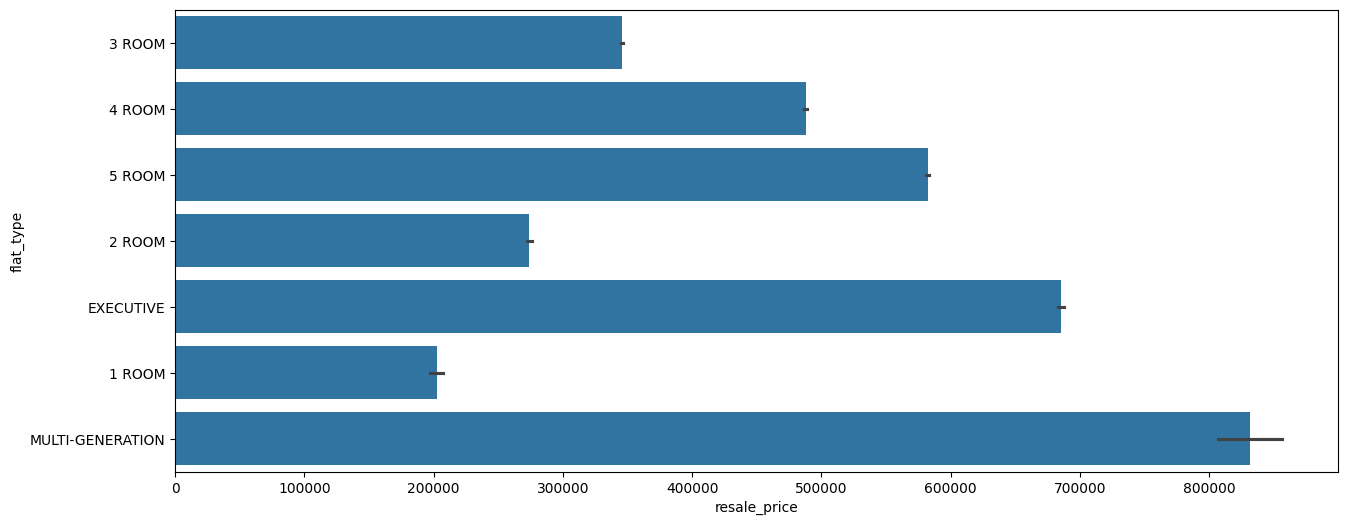

In [39]:

plt.figure(figsize= (15,6))
sns.barplot(y = 'flat_type', x= 'resale_price',data = df )

<Axes: xlabel='resale_price', ylabel='town'>

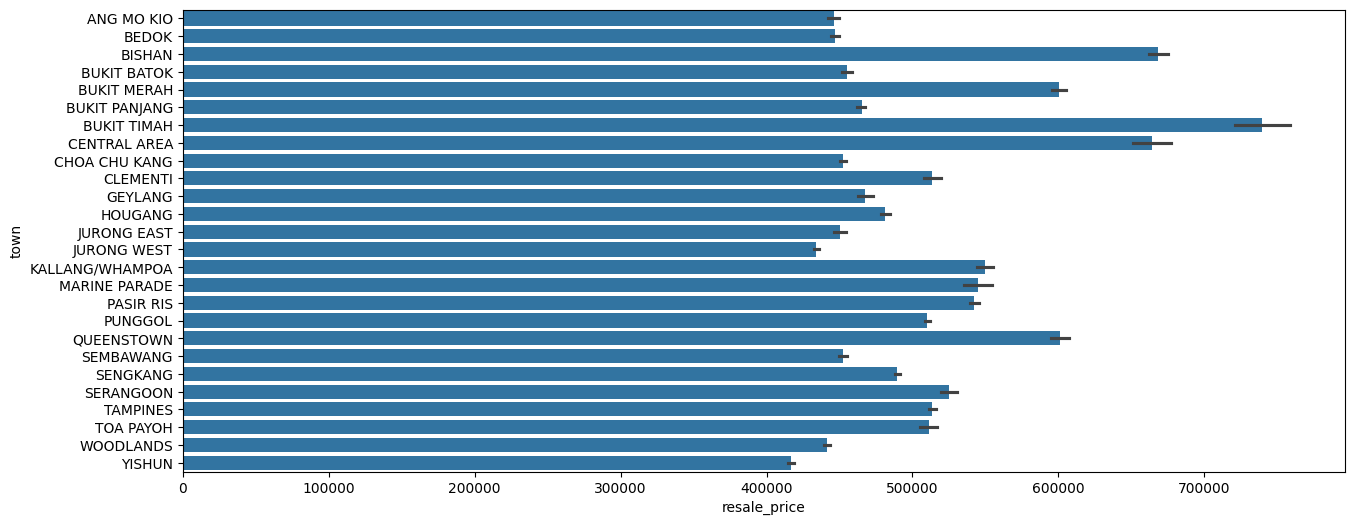

In [40]:
plt.figure(figsize= (15,6))
sns.barplot(y = 'town', x= 'resale_price',data = df )

<Axes: xlabel='lease_commence_year', ylabel='resale_price'>

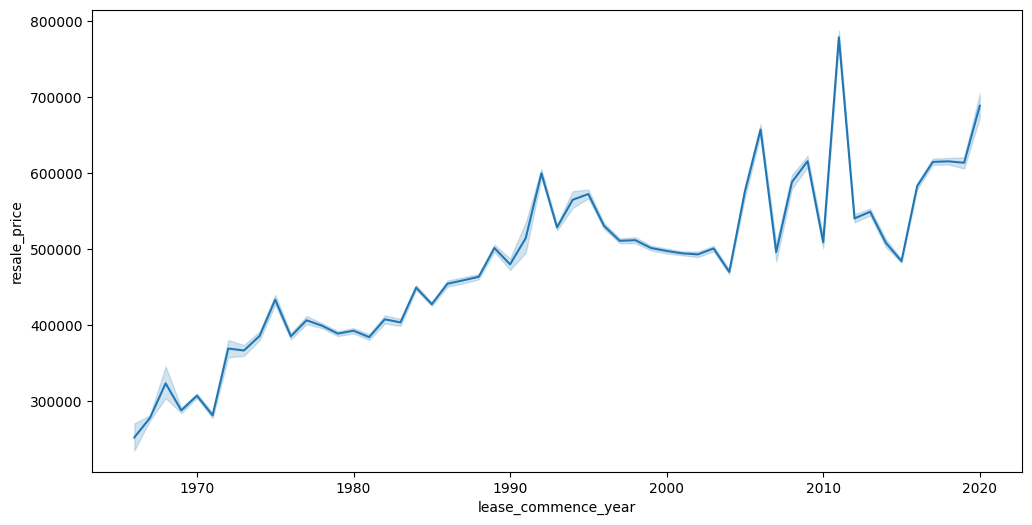

In [41]:
plt.figure(figsize = (12,6))
sns.lineplot(x = 'lease_commence_year' , y = 'resale_price', data = df)

<Axes: xlabel='remaining_lease_years', ylabel='resale_price'>

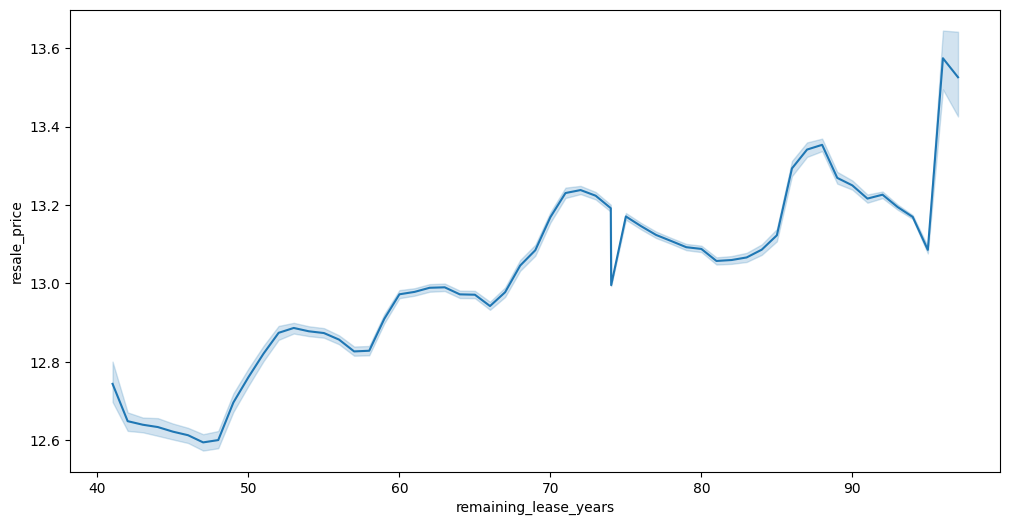

In [42]:
plt.figure(figsize = (12,6))
sns.lineplot(x = 'remaining_lease_years' , y = 'resale_price', data = df_new_data1)

DROPPING

In [43]:
# dropping the irrelvent feature 
df_new_data.drop(columns=['block','street_name'],inplace = True)
df_new_data

,town,flat_type,storey_range,floor_area_sqm,flat_model,resale_price,year,month_of_year,lease_commence_year,remaining_lease_years,remaining_lease_months
0,0,2,2,4.094345,5,12.449019,2015,1,1986,74.026074,6.533449
1,0,2,0,4.219508,12,12.524526,2015,1,1981,74.026074,6.533449
2,0,2,0,4.234107,12,12.560244,2015,1,1980,74.026074,6.533449
3,0,2,0,4.219508,12,12.577636,2015,1,1979,74.026074,6.533449
4,0,2,2,4.219508,12,12.577636,2015,1,1980,74.026074,6.533449
...,...,...,...,...,...,...,...,...,...,...,...
181985,25,5,1,4.983607,7,13.592367,2024,6,1988,63.000000,3.000000
181986,25,5,1,4.955827,3,13.652992,2024,6,1988,74.026074,6.533449
181987,25,5,3,4.983607,7,13.579788,2024,6,1986,74.026074,6.533449
181988,25,5,3,4.983607,7,13.815511,2024,6,1988,62.000000,8.000000


In [44]:
df_new_data.columns

Index(['town', 'flat_type', 'storey_range', 'floor_area_sqm', 'flat_model',
       'resale_price', 'year', 'month_of_year', 'lease_commence_year',
       'remaining_lease_years', 'remaining_lease_months'],
      dtype='object')

FINAL DATASET

In [45]:
final_df = df_new_data

In [46]:
#Purpose of Correlation Analysis:
#Identifying Redundancies: Highly correlated columns provide similar information, so one of the columns might be redundant. 
    #For instance, if two columns have a correlation coefficient greater than or equal to 0.7 (in absolute value), 
    #they are considered highly correlated.
#Reducing Multicollinearity: In predictive modeling, especially in regression analysis, multicollinearity 
    #(when predictor variables are highly correlated) can lead to unstable estimates and affect the model's performance. 
    #By removing one of the highly correlated columns, you can reduce multicollinearity.

In [47]:
#correlation matrix will show the correlation coefficients between the numeric columns in your dataset.
# Need to verify any columns are highly correlated using Heatmap. 
# If any columns correalaion value >= 0.7 (absolute value), drop the columns.

SEPRATING NUMERIC COLUMN

In [48]:
numeric_df = df_new_data.select_dtypes(include=['int32', 'float64'])

CALCULATING CORRELATION

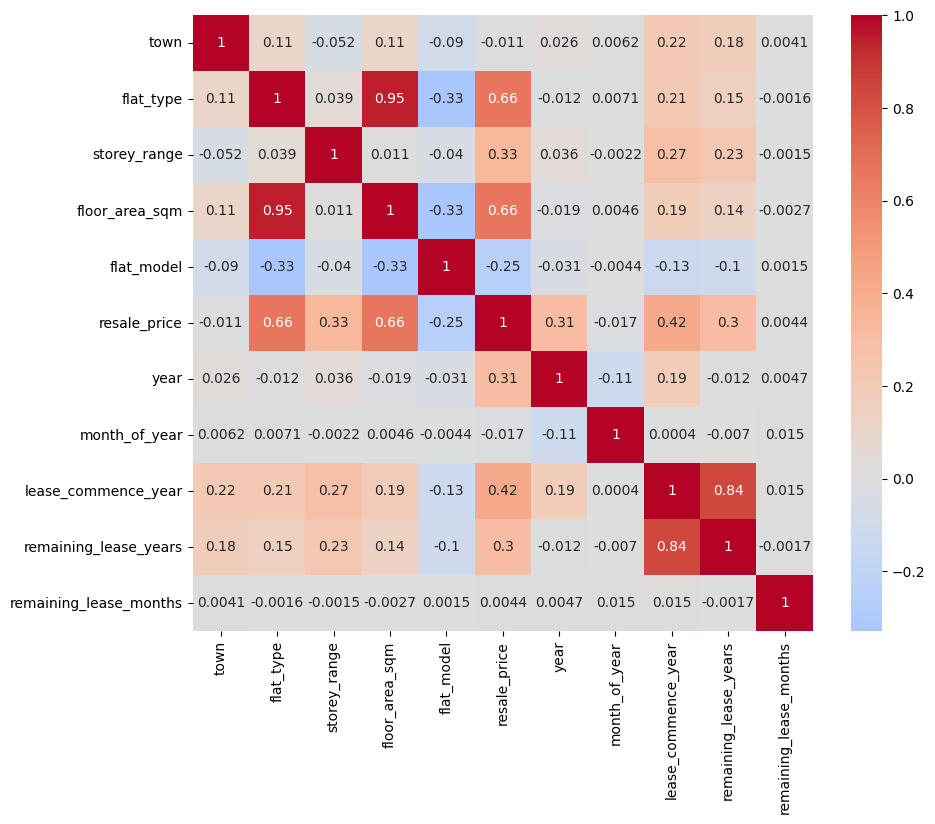

In [49]:


# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create a heat map
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)

# Show the plot
plt.show()

MODEL BUILDING 

In [50]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

In [62]:
# import sys
# print("RandomForestRegressor:", RandomForestRegressor)
# print("Type of RandomForestRegressor:", type(RandomForestRegressor))
# print("Built-in dict:", dict)
# print("Type of built-in dict:", type(dict))


In [51]:
#R2 Score: Measures the proportion of variance explained by the model.
#MAE: Measures the average magnitude of the errors.
#MSE: Measures the average squared difference between estimated and actual values.
#RMSE: The square root of MSE, provides error magnitude.
#MSLE: Measures the average squared difference between the logarithms of estimated and actual values.
#MAPE: Measures the accuracy as a percentage of the error.

CHECKING FOR BEST ALGORITHM

- LINEAR REGRESSION
- DECISION TREE REGRESSOR
- RANDOM FOREST REGRESSOR

In [52]:

def machine_learning_delivery_date(final_df, algorithm):
    x = final_df.drop(columns=['resale_price'], axis=1)
    y = final_df['resale_price']

    # Standardize the features of a dataset
    scaler = StandardScaler()
    x = scaler.fit_transform(x)
    
    # Train test splitting
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

    model = algorithm().fit(x_train, y_train)
    y_pred = model.predict(x_test)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    metrics = {
        'Algorithm': algorithm.__name__,
        'R2': r2,
        'Mean Absolute Error': mae,
        'Mean Squared Error': mse,
        'Root Mean Squared Error': rmse
    }

    return metrics




In [53]:
final_df = df_new_data

LinearRegression = machine_learning_delivery_date(final_df, LinearRegression)
DecisionTreeRegressor = machine_learning_delivery_date(final_df, DecisionTreeRegressor)
RandomForestRegressor = machine_learning_delivery_date(final_df, RandomForestRegressor)

print(LinearRegression)
print(DecisionTreeRegressor)
print(RandomForestRegressor)

{'Algorithm': 'LinearRegression', 'R2': 0.6811907858466968, 'Mean Absolute Error': 0.1458331962568872, 'Mean Squared Error': 0.03491064999562147, 'Root Mean Squared Error': 0.18684391880824344}
{'Algorithm': 'DecisionTreeRegressor', 'R2': 0.9214330702463718, 'Mean Absolute Error': 0.0658305053340963, 'Mean Squared Error': 0.008603335362009253, 'Root Mean Squared Error': 0.09275416627844407}
{'Algorithm': 'RandomForestRegressor', 'R2': 0.9562957495330672, 'Mean Absolute Error': 0.050555752277907956, 'Mean Squared Error': 0.004785758138842236, 'Root Mean Squared Error': 0.06917917416999307}


In [54]:
#If metrics_rfr shows a very high R2 score and very low errors for training data 
#but significantly worse metrics for testing data, it indicates overfitting.

In [55]:
# select the model with the highest R2 value and 
# the lowest values for MAE, MSE, and RMSE, indicating better predictive performance and a better fit to the data.

In [56]:
# Random Forest algorithm is low bias and reduce overfitting compared to others.

In [63]:
# import sklearn
# print("sklearn version:", sklearn.__version__)

# # List all modules in sklearn to see if there is any unexpected content
# import pkgutil
# for importer, modname, ispkg in pkgutil.iter_modules(sklearn.__path__):
#     print(modname)


Initial Validation with RandomForestRegressor
This section validates the best-performing model before hyperparameter tuning.

In [64]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# Assuming df_new_data is already defined and loaded
final_df = df_new_data

# Separate features and target variable
x = final_df.drop(columns=['resale_price'], axis=1)
y = final_df['resale_price']

# Standardize the features
scaler = StandardScaler()
x = scaler.fit_transform(x)

# Split the data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

# Initialize and fit the model
RFR = RandomForestRegressor(n_estimators=50, random_state=0)
RFR.fit(x_train, y_train)

# Predictions
y_pred_train = RFR.predict(x_train)
y_pred_test = RFR.predict(x_test)

# Metrics
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print("R2 Score Train:", r2_train)
print("R2 Score Test:", r2_test)



R2 Score Train: 0.9927590013062629
R2 Score Test: 0.9546816025134988


In [65]:
# r2_train is significantly higher than r2_test, this suggests overfitting.



In [66]:
# we got good accuracy after oversampling
# RandomForestRegressor have good testing accuracy, but in training accuracy is overfitting.


In [67]:
# GridsearchCV is a cross validation function.

# Hyper parameter tuning - we give parameter values manually in the algorithm to reduce the overfitting issue and get better accuracy.

# so using gridserachcv method - to pass the mulitiple values in each parameters and it try to evaluate all the combination of values and
# finally return the best accuracy parameter values based on the score.

# example: {'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 5}


Hyperparameter Tuning
This section uses GridSearchCV to find the best hyperparameters.

In [68]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'max_depth': [20],
    'min_samples_split': [5],
    'min_samples_leaf': [2],
    'max_features': ['log2']
}

# Initialize GridSearchCV
grid_search = GridSearchCV(RandomForestRegressor(), param_grid=param_grid, cv=5)
grid_search.fit(x_train, y_train)

# Best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best CV Score:", best_score)


Best Parameters: {'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 5}
Best CV Score: 0.9285759456427943


Validation with Tuned Hyperparameters
This section validates the model using the best hyperparameters found.

In [69]:
# Initialize the model with tuned hyperparameters
best_model = RandomForestRegressor(
    max_depth=20,
    max_features='log2',
    min_samples_leaf=2,
    min_samples_split=5,
    random_state=42
)

# Fit the model
best_model.fit(x_train, y_train)

# Predictions
y_pred_train = best_model.predict(x_train)
y_pred_test = best_model.predict(x_test)

# Metrics
print('Mean Squared Error:', mean_squared_error(y_test, y_pred_test))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred_test))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred_test)))
print('R2:', r2_score(y_test, y_pred_test))


Mean Squared Error: 0.007459144620132188
Mean Absolute Error: 0.0626077595040703
Root Mean Squared Error: 0.08636633962448674
R2: 0.9315705997796702


In [70]:
#Techniques to Address Overfitting
#Simplify the Model: Reduce max_depth, n_estimators, etc.
#Cross-Validation: Ensure cross-validation is properly performed to get a more accurate estimate of model performance.
#Regularization: For RandomForestRegressor, regularization can be indirectly controlled by parameters like max_depth, min_samples_split, min_samples_leaf, and max_features.
#Early Stopping: Not applicable directly to RandomForest, but you can stop adding more trees if no significant improvement is observed.

In [71]:
#Model Performance Check: Determines the best algorithm based on initial metrics.
#Initial Validation: Validates the chosen model before tuning.
#Hyperparameter Tuning: Uses GridSearchCV to find the best hyperparameters.
#Validation with Tuned Hyperparameters: Validates the model with the best hyperparameters.

MANUAL PREDICTION

In [72]:

# will pass the user data manually to check the prediction of status ar our model

user_data = np.array([[0,1,3,3.785069,5,2017,1,1979,61.000000,4.000000]])
y_prediction = best_model.predict(user_data)
y_prediction[0]

13.788347524561749

In [81]:

user_data = np.array([[4, 3, 2, 4.785069, 4, 2023, 3, 1900, 69.000000, 4.000000]])

# Predict the log resale price
y_prediction_log = best_model.predict(user_data)

# Convert the log resale price back to the original price
y_prediction = np.exp(y_prediction_log[0])

print(y_prediction)


808841.9929409592


SAVE THE FILE IN PICKLE 

In [75]:
import pickle

In [76]:

with open('regression_model.pkl', 'wb') as f:
    
    pickle.dump(best_model, f) # load the model


In [80]:
with open("D://6_Singapore Resale Flat Prices Predicting//regression_model.pkl", 'rb') as f:
    
    model = pickle.load(f)

# Predicting
user_data = np.array([[4, 3, 2, 4.785069, 4, 2023, 3, 1900, 69.000000, 4.000000]])
prediction = model.predict(user_data)
predicted_price = prediction[0]
original_price = np.exp(predicted_price)
print(original_price)

808841.9929409592


In [84]:
with open("D://6_Singapore Resale Flat Prices Predicting//regression_model.pkl", 'rb') as f:
    
    model = pickle.load(f)

# Predicting
user_data_1 = np.array([[25, 5, 3, 4.983607, 7, 2024, 6, 1988, 62.000000, 8.000000]])
prediction = model.predict(user_data_1)
predicted_price = prediction[0]
original_price = np.exp(predicted_price)
print(original_price)

812746.671849061


In [78]:
final_df

,town,flat_type,storey_range,floor_area_sqm,flat_model,resale_price,year,month_of_year,lease_commence_year,remaining_lease_years,remaining_lease_months
0,0,2,2,4.094345,5,12.449019,2015,1,1986,74.026074,6.533449
1,0,2,0,4.219508,12,12.524526,2015,1,1981,74.026074,6.533449
2,0,2,0,4.234107,12,12.560244,2015,1,1980,74.026074,6.533449
3,0,2,0,4.219508,12,12.577636,2015,1,1979,74.026074,6.533449
4,0,2,2,4.219508,12,12.577636,2015,1,1980,74.026074,6.533449
...,...,...,...,...,...,...,...,...,...,...,...
181985,25,5,1,4.983607,7,13.592367,2024,6,1988,63.000000,3.000000
181986,25,5,1,4.955827,3,13.652992,2024,6,1988,74.026074,6.533449
181987,25,5,3,4.983607,7,13.579788,2024,6,1986,74.026074,6.533449
181988,25,5,3,4.983607,7,13.815511,2024,6,1988,62.000000,8.000000


In [79]:
# save final processed data
final_df.to_csv("final_data.csv")